## task4_2(fill the missing data with extreme forest)

### 预处理

In [1]:
import pandas as pd
import numpy as np
all_data=pd.read_csv('PRSA_data.csv')

In [2]:
#Four dummy variables are introduced to deal with 'cbwd'
all_data['cvornot']=all_data['cbwd']=='cv'
for i in range(len(all_data)):
    if all_data['cvornot'][i]==True:
        all_data['cvornot'][i]=1
    else:
        all_data['cvornot'][i]=0

all_data['NEornot']=all_data['cbwd']=='NE'
for i in range(len(all_data)):
    if all_data['NEornot'][i]==True:
        all_data['NEornot'][i]=1
    else:
        all_data['NEornot'][i]=0

all_data['NWornot']=all_data['cbwd']=='NW'
for i in range(len(all_data)):
    if all_data['NWornot'][i]==True:
        all_data['NWornot'][i]=1
    else:
        all_data['NWornot'][i]=0

all_data['SEornot']=all_data['cbwd']=='SE'
for i in range(len(all_data)):
    if all_data['SEornot'][i]==True:
        all_data['SEornot'][i]=1
    else:
        all_data['SEornot'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_18540/3183737851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cvornot'][i]=0
d:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\lzh\AppData\Local\Temp/ipykernel_18540/3183737851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['NEornot'][i

In [3]:
#night morning afternoon evening
all_data['nightornot']=all_data['hour']<6 #treat 0 1 2 3 4 5 as night
for i in range(len(all_data)):
    if all_data['nightornot'][i]==True:
        all_data['nightornot'][i]=1
    else:
        all_data['nightornot'][i]=0

all_data['morningornot']=(all_data['hour']>5)&(all_data['hour']<12)  #treat 6 7 8 9 10 11 as morning
for i in range(len(all_data)):
    if all_data['morningornot'][i]==True:
        all_data['morningornot'][i]=1
    else:
        all_data['morningornot'][i]=0

all_data['afternoonornot']=(all_data['hour']>11)&(all_data['hour']<18)  #treat 12 13 14 15 16 17 as afternoon 
for i in range(len(all_data)):
    if all_data['afternoonornot'][i]==True:
        all_data['afternoonornot'][i]=1
    else:
        all_data['afternoonornot'][i]=0

all_data['eveningornot']=(all_data['hour']>17)  #treat 18 19 20 21 22 23 24 as evening
for i in range(len(all_data)):
    if all_data['eveningornot'][i]==True:
        all_data['eveningornot'][i]=1
    else:
        all_data['eveningornot'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_18540/1125572838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['nightornot'][i]=1
d:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\lzh\AppData\Local\Temp/ipykernel_18540/1125572838.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['morningo

In [4]:
#节假日
from datetime import date
all_data['weekdaysornot']=all_data['hour']<6
for i in range(len(all_data)):
    a=all_data['year'][i]
    b=all_data['month'][i]
    c=all_data['day'][i]
    if (date(a,b,c).weekday()==0) or (date(a,b,c).weekday()==1) or (date(a,b,c).weekday()==2) or (date(a,b,c).weekday()==3) or (date(a,b,c).weekday()==4):
        all_data['weekdaysornot'][i]=1
    else:
        all_data['weekdaysornot'][i]=0
#节假日也归为weekends
for i in range(len(all_data)):
    if (all_data['month'][i]==5)and(all_data['day'][i]==1 or all_data['day'][i]==2 or all_data['day'][i]==3):
        all_data['weekdaysornot'][i]=0
    if (all_data['month'][i]==10)and(all_data['day'][i]==1 or all_data['day'][i]==2 or all_data['day'][i]==3 or all_data['day'][i]==4 or all_data['day'][i]==5 or all_data['day'][i]==6 or all_data['day'][i]==7):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2010)and(all_data['month'][i]==1)and(all_data['day'][i]>7)and(all_data['day'][i]<20):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2011)and(all_data['month'][i]==1)and(all_data['day'][i]>28)and(all_data['day'][i]<31):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2011)and(all_data['month'][i]==2)and(all_data['day'][i]>0)and(all_data['day'][i]<9):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2012)and(all_data['month'][i]==1)and(all_data['day'][i]>18)and(all_data['day'][i]<29):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2013)and(all_data['month'][i]==2)and(all_data['day'][i]>5)and(all_data['day'][i]<16):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2014)and(all_data['month'][i]==1)and(all_data['day'][i]>25)and(all_data['day'][i]<31):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2014)and(all_data['month'][i]==2)and(all_data['day'][i]>0)and(all_data['day'][i]<6):
        all_data['weekdaysornot'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_18540/410020112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['weekdaysornot'][i]=1
d:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
#考虑政策影响
all_data['before_police_or_not']=all_data['year']<2014  
for i in range(len(all_data)):
    if all_data['before_police_or_not'][i]==True:
        all_data['before_police_or_not'][i]=1
    else:
        all_data['before_police_or_not'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_18540/3335211253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['before_police_or_not'][i]=1
d:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
#考虑季节和供暖期，月份划分为这几个种类：4-5（春）  6-9（夏） 10（秋，但农民收获季） 11（秋，供暖） 12-3（冬，供暖）
all_data['month_class_one_or_not']=all_data['month']==0
for i in range(len(all_data)):
    if (all_data['month'][i]>3)&(all_data['month'][i]<6):
        all_data['month_class_one_or_not'][i]=1
    else:
        all_data['month_class_one_or_not'][i]=0

all_data['month_class_two_or_not']=all_data['month']==0
for i in range(len(all_data)):
    if (all_data['month'][i]>5)&(all_data['month'][i]<10):
        all_data['month_class_two_or_not'][i]=1
    else:
        all_data['month_class_two_or_not'][i]=0

all_data['month_class_three_or_not']=all_data['month']==10
for i in range(len(all_data)):
    if all_data['month_class_three_or_not'][i]==True:
        all_data['month_class_three_or_not'][i]=1
    else:
        all_data['month_class_three_or_not'][i]=0

all_data['month_class_four_or_not']=all_data['month']==11
for i in range(len(all_data)):
    if all_data['month_class_four_or_not'][i]==True:
        all_data['month_class_four_or_not'][i]=1
    else:
        all_data['month_class_four_or_not'][i]=0

all_data['month_class_five_or_not']=all_data['month']==0
for i in range(len(all_data)):
    if (all_data['month'][i]>11)|(all_data['month'][i]<4):
        all_data['month_class_five_or_not'][i]=1
    else:
        all_data['month_class_five_or_not'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_18540/3193024643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month_class_one_or_not'][i]=0
d:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\lzh\AppData\Local\Temp/ipykernel_18540/3193024643.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_da

In [7]:
#Fill the missing data with extreme forest regression
import copy
from sklearn.ensemble import ExtraTreesRegressor
all_data_nan=copy.deepcopy(all_data)  #存储含nan的行
all_data_isan=copy.deepcopy(all_data)  #存储不含nan的行
for i in range(len(all_data)):
    if np.isnan(all_data['pm2.5'][i])==True:
        all_data_isan.drop(index=i,inplace=True)
    else:
        all_data_nan.drop(index=i,inplace=True)

etr=ExtraTreesRegressor()
etr.fit(all_data_isan[['DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot','nightornot','morningornot','afternoonornot','eveningornot','weekdaysornot','before_police_or_not','month_class_one_or_not','month_class_two_or_not','month_class_three_or_not','month_class_four_or_not','month_class_five_or_not']],all_data_isan['pm2.5'])
all_data_nan['pm2.5']=etr.predict(all_data_nan[['DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot','nightornot','morningornot','afternoonornot','eveningornot','weekdaysornot','before_police_or_not','month_class_one_or_not','month_class_two_or_not','month_class_three_or_not','month_class_four_or_not','month_class_five_or_not']])

for i in all_data_nan.index:
    all_data['pm2.5'][i]=all_data_nan['pm2.5'][i]

C:\Users\lzh\AppData\Local\Temp/ipykernel_18540/1978452527.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['pm2.5'][i]=all_data_nan['pm2.5'][i]


In [8]:
#用lof算法分别识别离群值,并除去
from sklearn.neighbors import LocalOutlierFactor
model= LocalOutlierFactor(n_neighbors=60, contamination=0.2)  #由于样本数量较多，我们保留约五分之四的数据
all_data['outlierornot']=model._fit_predict(all_data.iloc[:,[5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]])
for i in all_data.index:
    if all_data['outlierornot'][i]==-1:
        all_data.drop(index=i,inplace=True)
for i in all_data.index:
    if ((all_data['pm2.5'][i]==0)|(all_data['pm2.5'][i]<0)):
        all_data.drop(index=i,inplace=True)

In [9]:
#splitting data to X and y & do log to y
from scipy import stats
all_data_X=all_data[['DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot','nightornot','morningornot','afternoonornot','eveningornot','weekdaysornot','before_police_or_not','month_class_one_or_not','month_class_two_or_not','month_class_three_or_not','month_class_four_or_not','month_class_five_or_not']]
all_data_y=all_data[['year','month','day','pm2.5']]
all_data_y['pm2.5']=np.log(all_data['pm2.5'])

C:\Users\lzh\AppData\Local\Temp/ipykernel_18540/3918172830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_y['pm2.5']=np.log(all_data['pm2.5'])


### PCA

In [10]:
# PCA 选择x变量(待选择多个)
from sklearn import decomposition

n_component = 21
pca = decomposition.PCA(n_components=n_component )
all_data_X_21 = pca.fit_transform(all_data_X) 

# 先查看不同方向上的var大小，可见可以去掉最后三个特征
print(pca.explained_variance_)
# 查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
print(pca.explained_variance_ratio_)


[2.16589044e+03 3.63753760e+02 2.66043460e+01 1.63868266e+01
 3.37778243e-01 2.51665297e-01 2.30419015e-01 2.21432802e-01
 2.18092585e-01 1.98349815e-01 1.70642108e-01 1.54757489e-01
 1.47529907e-01 1.30235961e-01 1.07913354e-01 8.51823676e-02
 5.45200111e-02 3.91550378e-02 2.86648347e-32 2.19890813e-32
 6.91572153e-33]
[8.41128039e-01 1.41264526e-01 1.03318529e-02 6.36385806e-03
 1.31176880e-04 9.77347394e-05 8.94837018e-05 8.59938874e-05
 8.46967070e-05 7.70295614e-05 6.62692160e-05 6.01003912e-05
 5.72935449e-05 5.05774051e-05 4.19083744e-05 3.30807489e-05
 2.11729592e-05 1.52059400e-05 1.11320479e-35 8.53950528e-36
 2.68573478e-36]


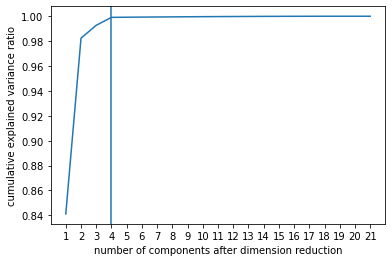

In [11]:
# 选择最好的n_components：累积可解释方差贡献率曲线
import matplotlib.pyplot as plt
plt.plot(range(1,22),np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,22)) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.axvline(4)
plt.show()

### 尝试选择前4个方差最大的变量

In [21]:
# 尝试选择前4个方差最大的变量
n_component = 4
pca = decomposition.PCA(n_components=n_component )
all_data_X_4 = pca.fit_transform(all_data_X) 
all_data_X_4 = pd.DataFrame(all_data_X_4)
all_data_X_4.index=all_data.index

In [22]:
# labeling the plot
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
labels

{'0': 'PC 1 (84.1%)',
 '1': 'PC 2 (14.1%)',
 '2': 'PC 3 (1.0%)',
 '3': 'PC 4 (0.6%)'}

In [23]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task2_X=copy.deepcopy(pd.DataFrame(all_data_X_4))
test_data_task2_X=copy.deepcopy(pd.DataFrame(all_data_X_4))

train_data_task2_y=copy.deepcopy(all_data_y)
test_data_task2_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if date(all_data['year'][i],all_data['month'][i],all_data['day'][i]).weekday()==3:
      train_data_task2_X.drop(index=i,inplace=True)
      train_data_task2_y.drop(index=i,inplace=True)
   else:
      test_data_task2_X.drop(index=i,inplace=True)
      test_data_task2_y.drop(index=i,inplace=True)

In [24]:
#Do the OLS regression required in task 2
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
lm.score(train_data_task2_X,train_data_task2_y['pm2.5']),lm.score(test_data_task2_X,test_data_task2_y['pm2.5'])

(0.40915567233981776, 0.4086972102101427)

In [25]:
#Ridge regression
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
lr.score(train_data_task2_X,train_data_task2_y['pm2.5']),lr.score(test_data_task2_X,test_data_task2_y['pm2.5'])

(0.40915567233926453, 0.4086972394502909)

In [26]:
#Ridge with CV
from sklearn.linear_model import RidgeCV
alphas=np.logspace(-10,10,200)  
lr_cv=RidgeCV(alphas=alphas).fit(train_data_task2_X,train_data_task2_y['pm2.5'])  
lr=Ridge(lr_cv.alpha_)
lr.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
lr.score(train_data_task2_X,train_data_task2_y['pm2.5']),lr.score(test_data_task2_X,test_data_task2_y['pm2.5'])

(0.4091556677434046, 0.40869987060103763)

In [27]:
#LASSO regression
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
la.score(train_data_task2_X,train_data_task2_y['pm2.5']),la.score(test_data_task2_X,test_data_task2_y['pm2.5'])

(0.30802330134603695, 0.32310598545986746)

In [28]:
#catboost
from catboost import CatBoostRegressor
score_4=pd.DataFrame(columns=['learning_rate','score'])
for i in range(-10,11):
    # ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.03982+i*0.0001/20)
    learning_rate = 0.035+0.001*i
    ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=learning_rate)
    ctr.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
    new=pd.DataFrame({'learning_rate':learning_rate,'score':ctr.score(test_data_task2_X,test_data_task2_y['pm2.5'])},index=[1])
    score_4=score_4.append(new,ignore_index=True)



0:	learn: 0.9950597	total: 3.86ms	remaining: 5.79s
1:	learn: 0.9856390	total: 7.6ms	remaining: 5.69s
2:	learn: 0.9768599	total: 11.8ms	remaining: 5.88s
3:	learn: 0.9681502	total: 15.4ms	remaining: 5.77s
4:	learn: 0.9594413	total: 19.1ms	remaining: 5.71s
5:	learn: 0.9511029	total: 22.8ms	remaining: 5.69s
6:	learn: 0.9433585	total: 26.8ms	remaining: 5.71s
7:	learn: 0.9357396	total: 30.3ms	remaining: 5.65s
8:	learn: 0.9283219	total: 33.9ms	remaining: 5.62s
9:	learn: 0.9213013	total: 37.3ms	remaining: 5.56s
10:	learn: 0.9146251	total: 41ms	remaining: 5.54s
11:	learn: 0.9081218	total: 44.7ms	remaining: 5.54s
12:	learn: 0.9021094	total: 48.1ms	remaining: 5.5s
13:	learn: 0.8962082	total: 51.5ms	remaining: 5.46s
14:	learn: 0.8902621	total: 55.1ms	remaining: 5.45s
15:	learn: 0.8844954	total: 59.5ms	remaining: 5.52s
16:	learn: 0.8792540	total: 63.2ms	remaining: 5.51s
17:	learn: 0.8741219	total: 66.6ms	remaining: 5.48s
18:	learn: 0.8691420	total: 73ms	remaining: 5.69s
19:	learn: 0.8641799	total: 

In [29]:
print(score_4)

    learning_rate     score
0           0.025  0.542648
1           0.026  0.541454
2           0.027  0.542448
3           0.028  0.541720
4           0.029  0.542479
5           0.030  0.541908
6           0.031  0.542595
7           0.032  0.541668
8           0.033  0.541849
9           0.034  0.541942
10          0.035  0.541197
11          0.036  0.541388
12          0.037  0.540876
13          0.038  0.541636
14          0.039  0.541324
15          0.040  0.540943
16          0.041  0.540533
17          0.042  0.541201
18          0.043  0.540369
19          0.044  0.540185
20          0.045  0.540475


In [30]:
ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.0356099)
ctr.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
ctr.score(train_data_task2_X,train_data_task2_y['pm2.5']),ctr.score(test_data_task2_X,test_data_task2_y['pm2.5'])

0:	learn: 0.9909968	total: 7.48ms	remaining: 11.2s
1:	learn: 0.9778782	total: 11.4ms	remaining: 8.55s
2:	learn: 0.9657966	total: 15.1ms	remaining: 7.52s
3:	learn: 0.9540056	total: 18.9ms	remaining: 7.08s
4:	learn: 0.9424029	total: 22.5ms	remaining: 6.73s
5:	learn: 0.9316767	total: 26.3ms	remaining: 6.56s
6:	learn: 0.9220441	total: 29.6ms	remaining: 6.32s
7:	learn: 0.9122045	total: 36.4ms	remaining: 6.79s
8:	learn: 0.9028662	total: 41ms	remaining: 6.8s
9:	learn: 0.8942878	total: 45ms	remaining: 6.7s
10:	learn: 0.8859489	total: 48.5ms	remaining: 6.57s
11:	learn: 0.8778344	total: 52.6ms	remaining: 6.52s
12:	learn: 0.8705255	total: 56.5ms	remaining: 6.47s
13:	learn: 0.8637237	total: 60.6ms	remaining: 6.43s
14:	learn: 0.8568253	total: 64.3ms	remaining: 6.37s
15:	learn: 0.8503533	total: 67.8ms	remaining: 6.28s
16:	learn: 0.8443185	total: 71.3ms	remaining: 6.22s
17:	learn: 0.8386619	total: 75.1ms	remaining: 6.18s
18:	learn: 0.8330034	total: 79.2ms	remaining: 6.17s
19:	learn: 0.8279609	total: 

(0.5938734404379324, 0.5409718131484955)